# Task
Mount Google Drive, change the current working directory to a specified location within Google Drive, and set up Paddle OCR for use in Google Colab.

[link text](https:// [link text](https://))## Mount google drive

### Subtask:
Write and execute code to mount your Google Drive in the Colab environment.


**Reasoning**:
Mount Google Drive to access files within the Colab environment.



In [ ]:
# Mounts your Google Drive to the Colab environment so you can access files stored in Drive.
# Useful for loading datasets, saving outputs, or working with large files directly from Drive.

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Navigate to directory

### Subtask:
Write and execute code to change the current working directory to the location of your files in Google Drive.


**Reasoning**:
Import the `os` module and change the current working directory to the specified path in Google Drive.



In [ ]:
import os

# Construct the path to the desired directory. Replace 'Your_Folder_Path' with the actual path within your Google Drive.
# For example, if your files are in a folder named 'my_ocr_project' in your Drive, the path would be 'my_ocr_project'.
desired_directory_path = '/content/drive/MyDrive/PaddleOCR'

# Change the current working directory
os.chdir(desired_directory_path)

# Verify the change by printing the current working directory
print(f"Current working directory changed to: {os.getcwd()}")

Current working directory changed to: /content/drive/MyDrive/PaddleOCR


If you've already manually navigated to the PaddleOCR directory (e.g., via Google Drive or local setup),
There's no need to clone the repository again using git clone.
Cloning is only required when you're starting fresh or don't already have the PaddleOCR codebase.



In [ ]:
#Clone from Github:
!git clone https://github.com/PaddlePaddle/PaddleOCR

%cd PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 281594, done.
remote: Counting objects: 100% (2056/2056), done.
remote: Compressing objects: 100% (404/404), done.
remote: Total 281594 (delta 1858), reused 1652 (delta 1652), pack-reused 279538 (from 2)
Receiving objects: 100% (281594/281594), 1.49 GiB | 23.64 MiB/s, done.
Resolving deltas: 100% (222386/222386), done.
/content/PaddleOCR


In [ ]:
# Install PaddlePaddle with GPU (use CPU version if needed)
!pip install paddlepaddle-gpu -f https://www.paddlepaddle.org.cn/whl/mkl/avx/stable.html

# Install PaddleOCR dependencies
!pip install -r requirements.txt


Looking in links: https://www.paddlepaddle.org.cn/whl/mkl/avx/stable.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.5 MB/s eta 0:00:00


#Do Specific Changes Into Rec.yml (en_PP-OCRv4_mobile_rec.yml) file before start training:-

Global:
1. epoch_num
Sets the total number of training epochs. A higher value allows the model to learn more deeply, but may risk overfitting if the dataset is small or noisy.

2. save_model_dir:
Copy paste correct Directory path where trained model checkpoints and final outputs will be saved

3. pretrained_model
Starts training from scratch without loading any pretrained weights.

4. checkpoints:
Starts training from a previously saved checkpoint. Provide the path to the checkpoint file to resume training from that point. If set to None, training starts from scratch or uses pretrained_model if specified.

5. save_res_path:
Path to save prediction results during evaluation or inference. Helps track model output and compare against ground truth.

Train:
1. data_dir:
Directory containing training images. Copy paste the exact path.

2. label_file_list:
Copy paste the correct label file path

Evaluation:
1. data_dir:
Uses the same image directory for evaluation as training.

2. label_file_list:
Label file for evaluation. Again, same as training here.

In [ ]:
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv4_rec_train.tar && rm -rf en_PP-OCRv4_rec_train.tar
%cd ..

--2025-09-04 07:01:20--  https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2402:2b40:7000:628:0:ff:b0e8:88da
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190740480 (182M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv4_rec_train.tar’

en_PP-OCRv4_rec_tra 100%[===================>] 181.90M  51.5MB/s    in 4.3s    

2025-09-04 07:01:25 (42.5 MB/s) - ‘./pretrain_models/en_PP-OCRv4_rec_train.tar’ saved [190740480/190740480]

/content/PaddleOCR/pretrain_models
/content/PaddleOCR


# !python3 tools/train.py -c (Give the updated config path)

In [ ]:
#Single GPU Training

!python3 tools/train.py -c /content/drive/MyDrive/PaddleOCR/configs/rec/PP-OCRv4/en_PP-OCRv4_mobile_rec.yml  -o Global.pretrained_model=/content/drive/MyDrive/PaddleOCR/output/rec_ppocr_v4/iter_epoch_200.pdparams

In [ ]:
#Single GPU Training
!python3 tools/train.py -c /content/drive/MyDrive/PaddleOCR/configs/rec/PP-OCRv4/en_PP-OCRv4_mobile_rec.yml

Skipping import of the encryption module.
[2025/09/04 10:19:32] ppocr INFO: Architecture : 
[2025/09/04 10:19:33] ppocr INFO:     Backbone : 
[2025/09/04 10:19:33] ppocr INFO:         name : PPLCNetV3
[2025/09/04 10:19:33] ppocr INFO:         scale : 0.95
[2025/09/04 10:19:33] ppocr INFO:     Head : 
[2025/09/04 10:19:33] ppocr INFO:         head_list : 
[2025/09/04 10:19:33] ppocr INFO:             CTCHead : 
[2025/09/04 10:19:33] ppocr INFO:                 Head : 
[2025/09/04 10:19:33] ppocr INFO:                     fc_decay : 1e-05
[2025/09/04 10:19:33] ppocr INFO:                 Neck : 
[2025/09/04 10:19:33] ppocr INFO:                     depth : 2
[2025/09/04 10:19:33] ppocr INFO:                     dims : 120
[2025/09/04 10:19:33] ppocr INFO:                     hidden_dims : 120
[2025/09/04 10:19:33] ppocr INFO:                     kernel_size : [1, 3]
[2025/09/04 10:19:33] ppocr INFO:                     name : svtr
[2025/09/04 10:19:33] ppocr INFO:                     use

#After training, optimizing the model:


In [ ]:
# This command exports the trained text recognition model into an inference-ready format.
# - Uses the specified config file to define model architecture and parameters.
# - Loads weights from the trained checkpoint (iter_epoch_500.pdparams).
# - Saves the optimized model to ./inference/rec_ocr/ for deployment or real-time use.

!python3 tools/export_model.py \
  -c /content/drive/MyDrive/output2/rec_ppocr_v4/config.yml\
  -o Global.pretrained_model=/content/drive/MyDrive/output2/rec_ppocr_v4/iter_epoch_500.pdparams\
     Global.save_inference_dir=./inference/rec_ocr/ \
     Global.export_with_pir=False

Skipping import of the encryption module.
W0904 12:00:08.750348 38360 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.8
W0904 12:00:08.751250 38360 gpu_resources.cc:164] device: 0, cuDNN Version: 9.2.
[2025/09/04 12:00:09] ppocr INFO: resume from /content/drive/MyDrive/output2/rec_ppocr_v4/iter_epoch_270
[2025/09/04 12:00:09] ppocr INFO: Export inference config file to ./inference/rec_ocr/inference.yml
Skipping import of the encryption module
I0904 12:00:16.559237 38360 program_interpreter.cc:212] New Executor is Running.
[2025/09/04 12:00:16] ppocr INFO: inference model is saved to ./inference/rec_ocr/inference


In [ ]:
## Installs the paddle2onnx tool (version 1.2.11) to convert PaddleOCR models into ONNX format.

!python3 -m pip install paddle2onnx==1.2.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.2 MB/s eta 0:00:00


In [ ]:
# Converts the trained PaddleOCR recognition model into ONNX format using paddle2onnx.
# - model_dir: Directory containing the exported inference model.
# - model_filename and params_filename: Specify the structure and weights of the model.
# - save_file: Path to save the resulting ONNX model (rec_12.onnx) in Google Drive.
# - opset_version: Sets ONNX operator version for compatibility (v14 is widely supported).
# - enable_onnx_checker: Validates the exported ONNX model to ensure correctness.

import paddle
!paddle2onnx --model_dir /content/PaddleOCR/inference/rec_ocr \
--model_filename /content/PaddleOCR/inference/rec_ocr/inference.pdmodel\
--params_filename /content/PaddleOCR/inference/rec_ocr/inference.pdiparams\
--save_file /content/drive/MyDrive/PaddleOCR/inference/rec_ocr/rec_12.onnx \
--opset_version 14 \
--enable_onnx_checker True

[Paddle2ONNX] Start to parse PaddlePaddle model...
[Paddle2ONNX] Model file path: /content/PaddleOCR/inference/rec_ocr/inference.pdmodel
[Paddle2ONNX] Parameters file path: /content/PaddleOCR/inference/rec_ocr/inference.pdiparams
[Paddle2ONNX] Start to parsing Paddle model...
[Paddle2ONNX] Use opset_version = 14 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.


In [ ]:
# Optimizes the exported ONNX model (rec_12.onnx) for faster and more efficient inference.
# - input_model: Path to the original ONNX model.
# - output_model: Saves the optimized version as rec12_fixed.onnx.
# - input_shape_dict: Specifies fixed input dimensions for the model (batch size 1, RGB image, height 48, width 160),
#   which helps streamline runtime performance and reduce overhead during inference.

!python3 -m paddle2onnx.optimize \
  --input_model /content/drive/MyDrive/PaddleOCR/inference/rec_ocr/rec_12.onnx \
  --output_model /content/rec12_fixed.onnx \
  --input_shape_dict "{'x': [1, 3, 48, 160]}"


2025-09-04 12:05:19 [INFO]	Model optmized, saved in /content/rec12_fixed.onnx.


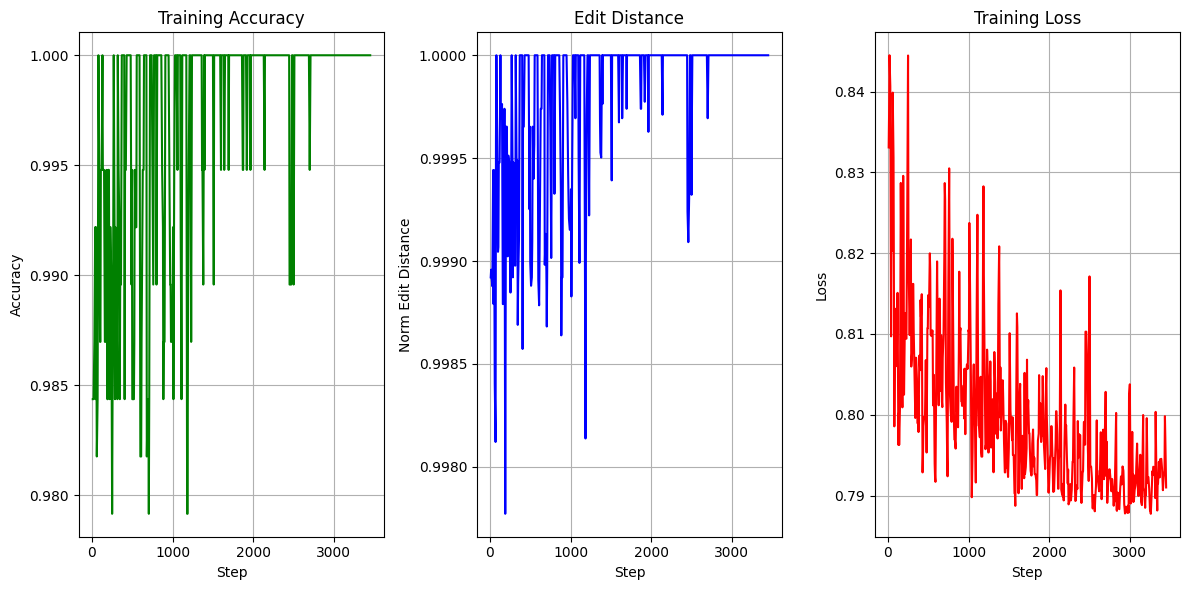

In [ ]:
# It extracts values for global_step, accuracy (acc), normalized edit distance (norm_edit_dis), and loss using regex.
# These metrics are then plotted to help monitor model performance over time:-
# - Accuracy shows how well the model is recognizing text.
# - Norm Edit Distance reflects how close predictions are to ground truth (lower is better).
# - Loss indicates how well the model is minimizing error during training.

import re
import matplotlib.pyplot as plt

# Path to your PaddleOCR training log file
log_file = "/content/train.log"   # change to your actual log path

# Storage
steps, accs, edits, losses = [], [], [], []

# Regex patterns for extracting values
pattern = re.compile(
    r"global_step: (\d+).*?acc: ([0-9.]+).*?norm_edit_dis: ([0-9.]+).*?loss: ([0-9.]+)"
)

# Read and parse
with open(log_file, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            step = int(match.group(1))
            acc = float(match.group(2))
            edit = float(match.group(3))
            loss = float(match.group(4))

            steps.append(step)
            accs.append(acc)
            edits.append(edit)
            losses.append(loss)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(steps, accs, label="Accuracy", color="green")
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(steps, edits, label="Norm Edit Distance", color="blue")
plt.xlabel("Step")
plt.ylabel("Norm Edit Distance")
plt.title("Edit Distance")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(steps, losses, label="Loss", color="red")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
